# Code to Download stock price data from yahoo finance
1. We will need to install yfinance to get some historical stock data.   
In conda environment: conda install -c conda-forge yfinance
2. More aboyt yfinance here: https://pypi.org/project/yfinance/


In [2]:

import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime # For time stamps to read data


In [3]:
# Read some data
yf.pdr_override()  # This makes sure the data format is same as pandas

# List of Companies 
company_list = ['GOOG', 'IBM']

end = datetime.now()
start = datetime(end.year -15, end.month - 0, end.day) # Read last 1 year

# Read Google (GOOG) and Microsoft (MSFT) data
# Each company's 5 different features of stocks are downloaded
for stock in company_list:
    globals()[stock] = yf.download(stock, start, end)

Google = GOOG.copy(deep = True)
Google.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-11-14,7.552940,8.094410,7.535754,7.721558,7.721558,382110897
2008-11-17,7.546713,7.725045,7.420935,7.474982,7.474982,302883041
2008-11-18,7.511097,7.564895,7.107111,7.407734,7.407734,335095329
2008-11-19,7.357174,7.476725,6.938493,6.978343,6.978343,314558640
2008-11-20,6.846587,7.047086,6.451817,6.464768,6.464768,392642224


In [4]:
# Lets look at some statisitcs of data and closing price time-series
Google.describe()


,Open,High,Low,Close,Adj Close,Volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,50.001716,50.527681,49.504310,50.027142,50.027142,6.312743e+07
std,39.054980,39.517543,38.637888,39.081223,39.081223,5.843960e+07
min,6.538243,6.709103,6.159413,6.411966,6.411966,1.584340e+05
25%,16.352767,16.556131,16.217153,16.413976,16.413976,2.591600e+07
50%,37.025751,37.250000,36.795774,37.025749,37.025749,3.867224e+07
75%,67.074497,67.653486,66.445684,67.152000,67.152000,8.436604e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,5.952147e+08


Text(0.5, 1.0, 'Closing Price of Google')

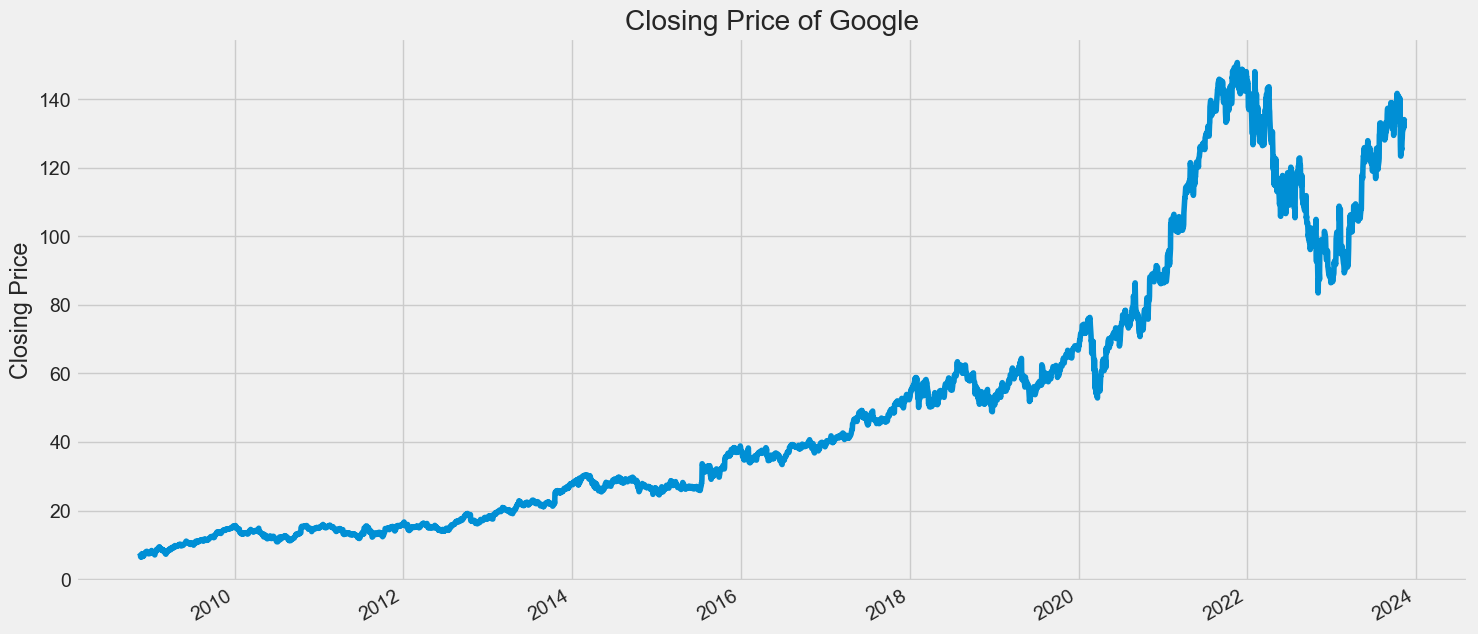

In [5]:
# We will use closing stock price as our data.  Lets look at close column
Google['Close'].plot(figsize=(16, 8))
plt.ylabel('Closing Price')
plt.xlabel(None)
plt.title(f"Closing Price of Google")   

In [6]:
# save as csv

GOOG.to_csv('Google.csv', index=False)